In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import norm, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('precision', 3)
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# DATA PREPROCESSING - EDA

## Load data

In [2]:
raw_data = pd.read_excel('mpg.data.xlsx')
df = raw_data.copy()
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN


In [3]:
df.drop('Unnamed: 9', axis=1, inplace=True)
df.drop('Unnamed: 10', axis=1, inplace=True)
df.drop('Unnamed: 11', axis=1, inplace=True)
df.drop('Unnamed: 12', axis=1, inplace=True)


In [4]:
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Handling 'car name' and 'origin'  variables

In [5]:
def split_func(s):
    return(s.split(' '))

df ['car name'] = df['car name'].apply(split_func)

for i in range(len(df['car name'])):
    df['car name'][i] = df['car name'][i][0]
    
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


In [6]:
df.rename(columns={'displayments': 'Displacement',
                    'mpg': 'MPG',
                    'cylinders': 'Cylinders',
                    'horsepower': 'Horsepower',
                     'weight': 'Weight',
                     'acceleration': 'Acceleration',
                      'model year': 'Model Year',
                      'origin': 'Origin',
                      'car name': 'Brand'}, inplace=True)

In [7]:
df['Brand'].value_counts()

ford             53
chevrolet        44
plymouth         32
amc              29
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       16
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
vw                6
saab              5
renault           5
subaru            4
opel              4
chevy             3
cadillac          2
mercedes-benz     2
maxda             2
bmw               2
citroen           1
chevroelt         1
capri             1
hi                1
toyouta           1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: Brand, dtype: int64

### Insight:We notice that there are some erroneous values (e.g. there is a car with brand name "toyouta" instead of "toyota" ). 
### We also combine datsun and nissan in a single brand since datsun belongs to nissan.

In [8]:
df['Brand'].replace(['vw', 'vokswagen', 'toyouta', 'mercedes', 'maxda', 'chevroelt', 'datsun'],
                       ['volkswagen', 'volkswagen', 'toyota', 'mercedes-benz','mazda','chevrolet', 'nissan'], inplace = True)

In [9]:
df['Brand'].value_counts()

ford             53
chevrolet        45
plymouth         32
amc              29
dodge            28
toyota           26
nissan           24
volkswagen       23
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
saab              5
renault           5
subaru            4
opel              4
mercedes-benz     3
chevy             3
bmw               2
cadillac          2
hi                1
capri             1
citroen           1
triumph           1
Name: Brand, dtype: int64

In [10]:
df['Brand'] = [i.title() for i in df['Brand']]
df['Brand'].replace([ 'Amc', 'Bmw', 'Hi'], ['AMC', 'BMW', 'HI'], inplace = True)
df['Brand'].value_counts()


Ford             53
Chevrolet        45
Plymouth         32
AMC              29
Dodge            28
Toyota           26
Nissan           24
Volkswagen       23
Buick            17
Pontiac          16
Honda            13
Mazda            12
Mercury          11
Oldsmobile       10
Peugeot           8
Fiat              8
Audi              7
Chrysler          6
Volvo             6
Saab              5
Renault           5
Subaru            4
Opel              4
Mercedes-Benz     3
Chevy             3
BMW               2
Cadillac          2
HI                1
Capri             1
Citroen           1
Triumph           1
Name: Brand, dtype: int64

In [11]:
df['Origin'] = df['Origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

In [12]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand
0,18.0,8,307.0,130.0,3504,12.0,70,USA,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,USA,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,USA,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,USA,AMC
4,17.0,8,302.0,140.0,3449,10.5,70,USA,Ford


In [13]:
def model_year(str):
    return('19' + str)
model_year(df[['Model Year']].iloc[0].astype(str))
df['Model Year'] = df[['Model Year']].astype(str).apply(model_year)
df['Model Year'] = df['Model Year'].astype(int)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,Buick
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,AMC
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,Ford


## Handling missing values

In [14]:
df.isnull().sum()

MPG             8
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Brand           0
dtype: int64

In [15]:
df.MPG = pd.to_numeric(df.MPG)
df.Horsepower = pd.to_numeric(df.Horsepower)

df[['Horsepower']] = df[['Horsepower']].replace(np.nan, df.Horsepower.mean())
df[['MPG']] = df[['MPG']].replace(np.nan, df.MPG.mean())

In [16]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,406.000,406.000,406.000,406.000,406.000,406.000,406.000
mean,23.515,5.475,194.780,105.083,2979.414,15.520,1975.921
std,7.738,1.712,104.922,38.481,847.004,2.803,3.749
min,9.000,3.000,68.000,46.000,1613.000,8.000,1970.000
25%,17.500,4.000,105.000,76.000,2226.500,13.700,1973.000
50%,23.000,4.000,151.000,95.000,2822.500,15.500,1976.000
75%,29.000,8.000,302.000,129.000,3618.250,17.175,1979.000
max,46.600,8.000,455.000,230.000,5140.000,24.800,1982.000


In [17]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Brand           0
dtype: int64

In [18]:
df.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand
133,21.0,6,200.0,105.082,2875,17.0,1974,USA,Ford
111,12.0,8,400.0,167.000,4906,12.5,1973,USA,Ford
44,18.0,6,232.0,100.000,3288,15.5,1971,USA,AMC
127,19.0,4,121.0,112.000,2868,15.5,1973,Europe,Volvo
60,31.0,4,71.0,65.000,1773,19.0,1971,Japan,Toyota
30,21.0,6,199.0,90.000,2648,15.0,1970,USA,AMC
140,16.0,6,250.0,100.000,3781,17.0,1974,USA,Chevrolet
109,26.0,4,97.0,46.000,1950,21.0,1973,Europe,Volkswagen
184,23.0,4,115.0,95.000,2694,15.0,1975,Europe,Audi
217,19.0,6,156.0,108.000,2930,15.5,1976,Japan,Toyota


In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MPG,406.0,23.515,7.738,9.0,17.5,23.0,29.000,46.6
Cylinders,406.0,5.475,1.712,3.0,4.0,4.0,8.000,8.0
Displacement,406.0,194.780,104.922,68.0,105.0,151.0,302.000,455.0
Horsepower,406.0,105.083,38.481,46.0,76.0,95.0,129.000,230.0
Weight,406.0,2979.414,847.004,1613.0,2226.5,2822.5,3618.250,5140.0
Acceleration,406.0,15.520,2.803,8.0,13.7,15.5,17.175,24.8
Model Year,406.0,1975.921,3.749,1970.0,1973.0,1976.0,1979.000,1982.0


In [20]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int32
Origin           object
Brand            object
dtype: object

In [21]:
numerical_feat = df.select_dtypes(exclude = "object")
categorical_feat = df.select_dtypes(include = "object")

print("Numeric Features are   : ", *numerical_feat)
print("Categoric Features are : ", *categorical_feat)


Numeric Features are   :  MPG Cylinders Displacement Horsepower Weight Acceleration Model Year
Categoric Features are :  Origin Brand


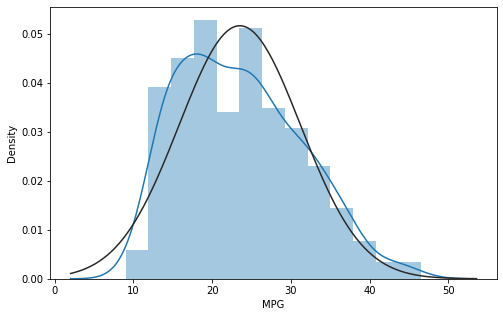

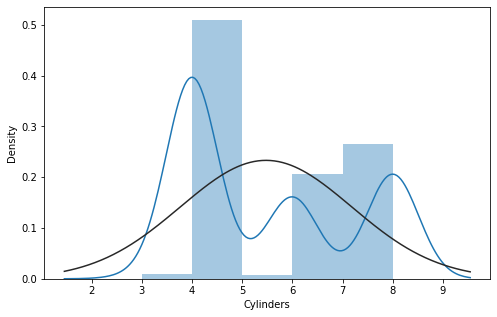

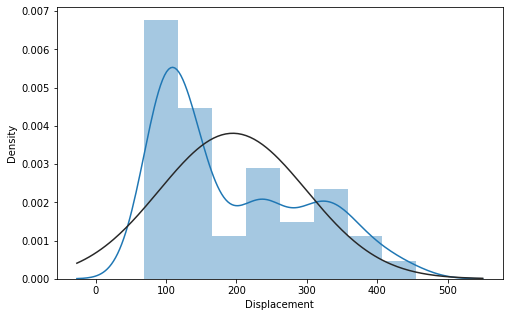

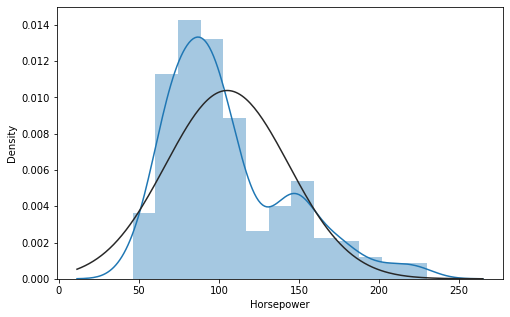

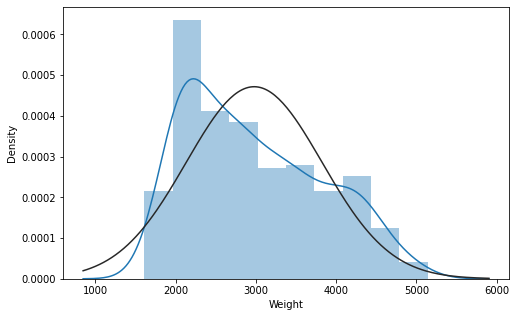

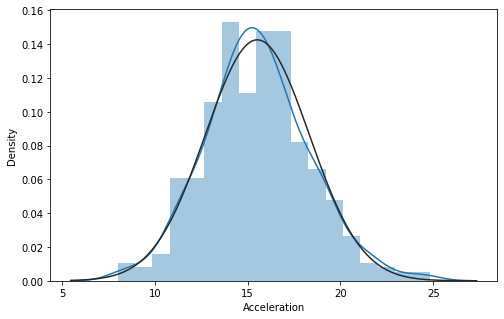

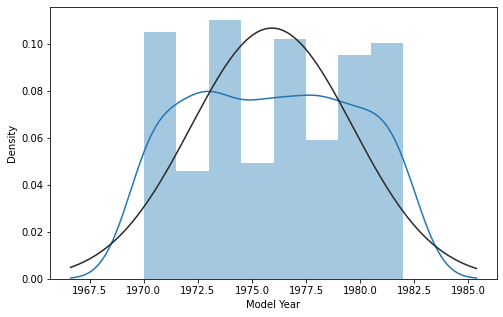

In [22]:
for column in numerical_feat.columns:
    plt.figure(figsize = (8,5))
    sns.distplot(df[column], fit=norm)
    plt.show

In [23]:
df['Cylinders'] = df['Cylinders'].astype(str)

numerical_feat = df.select_dtypes(exclude = "object")
categorical_feat = df.select_dtypes(include = "object")

In [24]:
def Skewness(df):
    skewed_feat = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame(skewed_feat, columns = ["Skew Value"])
    
    return skewness.style.background_gradient(cmap='summer')

In [25]:
Skewness(numerical_feat)

,Skew Value
Horsepower,1.038
Displacement,0.692
Weight,0.504
MPG,0.460
Acceleration,0.229
Model Year,0.021


### Insight: MPG and Acceleration have normal distribution while Weight, Horsepower and Displacement have more likely positively skewed distribution. Cylinders and Model Year are far from normal dist. It makes sense because both of them are actually categorical values.

In [26]:
categorical_feat.sample(5)

,Cylinders,Origin,Brand
52,6,USA,AMC
268,6,USA,AMC
60,4,Japan,Toyota
111,8,USA,Ford
81,8,USA,Ford


In [27]:
df['Cylinders'].value_counts(normalize=True)

4    0.510
8    0.266
6    0.207
3    0.010
5    0.007
Name: Cylinders, dtype: float64

Text(0.5, 1.0, 'Number of cylinders')

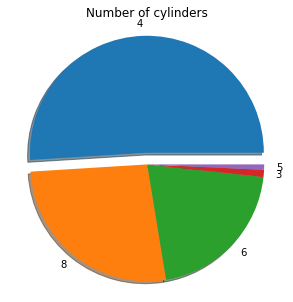

In [28]:
labels = pd.value_counts(df['Cylinders']).keys()
sizes = pd.value_counts(df['Cylinders'])
# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1
plt.figure(figsize=(5, 5))
properties = plt.pie(sizes, labels=labels, explode=explode, shadow=True)    
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of cylinders')

### **Insight:Half of the data consists of 4-cylinder cars**

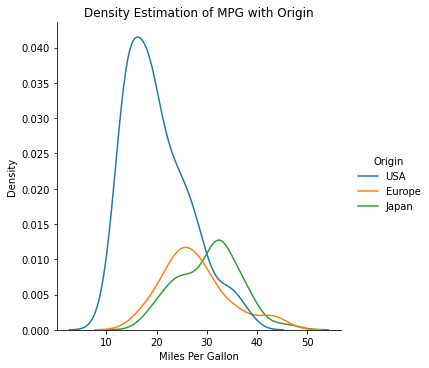

In [29]:
sns.displot(data=df, x='MPG', hue='Origin', kind='kde')
plt.title('Density Estimation of MPG with Origin')
plt.xlabel('Miles Per Gallon')
plt.show()

### **Insight:USA have by far the most cars but they have also the highest fuel-consumption**

**HEATMAP IN ALL VARIABLES**

<AxesSubplot:>

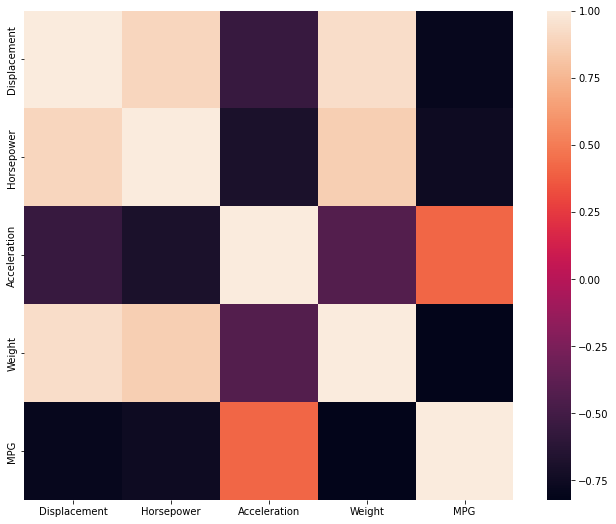

In [30]:
factors = ['Cylinders','Displacement','Horsepower','Acceleration','Weight','MPG']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

### **Insight: It is more than evident that MPG has strong correlation with Horsepower,Weight and Displacement. Moreover, Weight and Displacement are almost linearly correlated and Horsepower and Acceleration are negatively correlated**

**INSERTING A NEW COLUMN CALLED "FUEL CONSUMPTION" IN OUR DATA DIVIDING MPG IN HIGH (<17), MEDIUM(17<=X<29),LOW(>29)**








In [31]:
df['Fuel_Consumption'] = df['MPG'].apply(lambda x: 'high' if x<17 else 'low' if x>29 else 'medium')

## Encoding categorical data

In [32]:
df['Origin'].value_counts()

USA       254
Japan      79
Europe     73
Name: Origin, dtype: int64

**See which variables are categorical and numeric**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MPG               406 non-null    float64
 1   Cylinders         406 non-null    object 
 2   Displacement      406 non-null    float64
 3   Horsepower        406 non-null    float64
 4   Weight            406 non-null    int64  
 5   Acceleration      406 non-null    float64
 6   Model Year        406 non-null    int32  
 7   Origin            406 non-null    object 
 8   Brand             406 non-null    object 
 9   Fuel_Consumption  406 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 30.3+ KB


**Distribution of categorical variables**

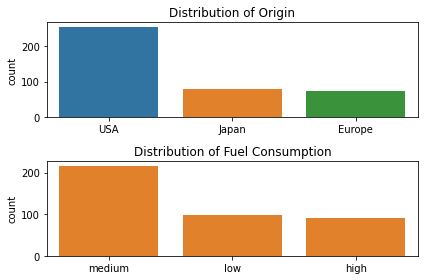

In [34]:
ax1 = plt.subplot(2,1,1)
sns.countplot(df['Origin'], order=df['Origin'].value_counts().index)
ax1.set_xlabel(None)
ax1.set_title(f'Distribution of Origin')
ax2 = plt.subplot(2,1,2)
sns.countplot(df['Fuel_Consumption'], color='C1', order=df['Fuel_Consumption'].value_counts().index)
ax2.set_xlabel(None)
ax2.set_title(f'Distribution of Fuel Consumption')
plt.tight_layout()
plt.show()

### Insight 1: We notice that most of the cars come from USA
### Insight 2: We notice also that most of the cars have medium Fuel_Consumption


**Cylinders per car manufacturer**

Text(0.5, 1.0, 'Cylinders per car manufacturer')

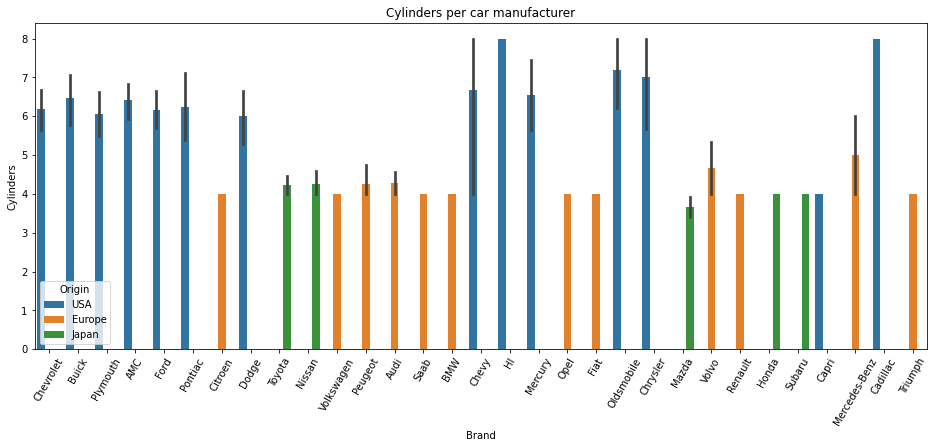

In [35]:
plt.figure(figsize = (16,6))
df[["Cylinders"]] = df[["Cylinders"]].apply(pd.to_numeric)
sns.barplot(x='Brand', y='Cylinders', hue='Origin', data=df)
plt.xticks(rotation=60)
plt.title('Cylinders per car manufacturer')


### Note: Brands with no confidence interval have used the same number of cylinders in all their cars

**MPG level per car manufacturer**

Text(0.5, 1.0, 'MPG level per car manufacturer')

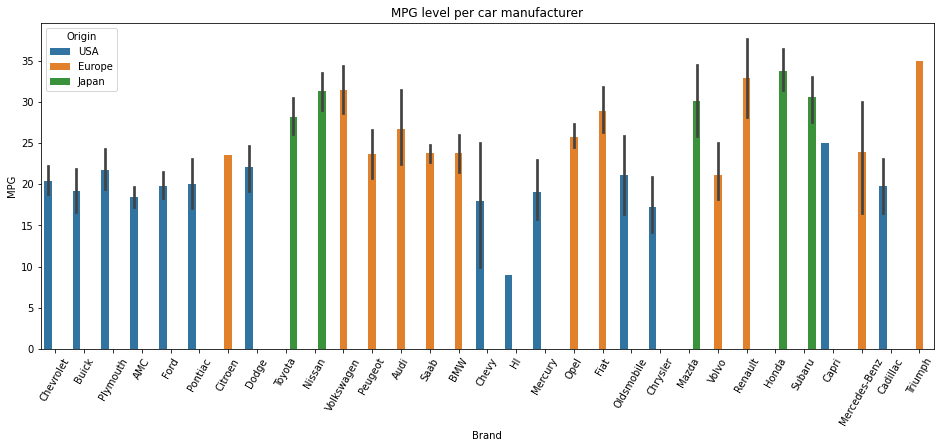

In [36]:
plt.figure(figsize = (16,6))
sns.barplot(x='Brand', y='MPG', hue='Origin', data=df)
plt.xticks(rotation=60)
plt.title('MPG level per car manufacturer')

**MPG level by model year**

Text(0.5, 1.0, 'MPG level by model year')

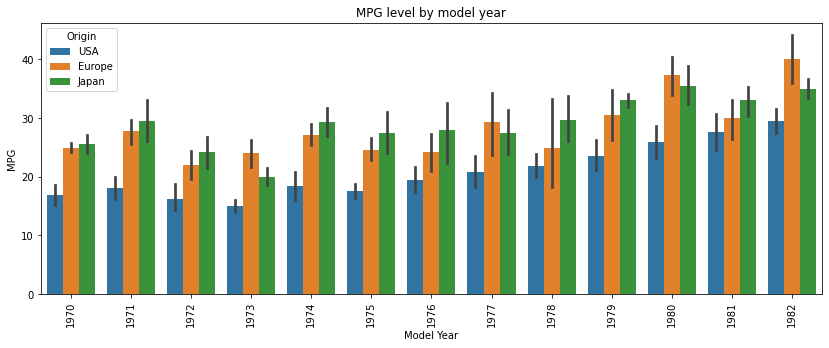

In [37]:
plt.figure(figsize = (14,5))
sns.barplot(x='Model Year', y='MPG', hue='Origin', data=df)
plt.xticks(rotation='vertical')
plt.title('MPG level by model year')

### Insight 1: USA has the lowest MPG level through the years 

### **Insight 2: From the barplot it can be assumed that as years pass the fuel-consumption for all origins is reduced**

#### **Plotting combination of categorical data**

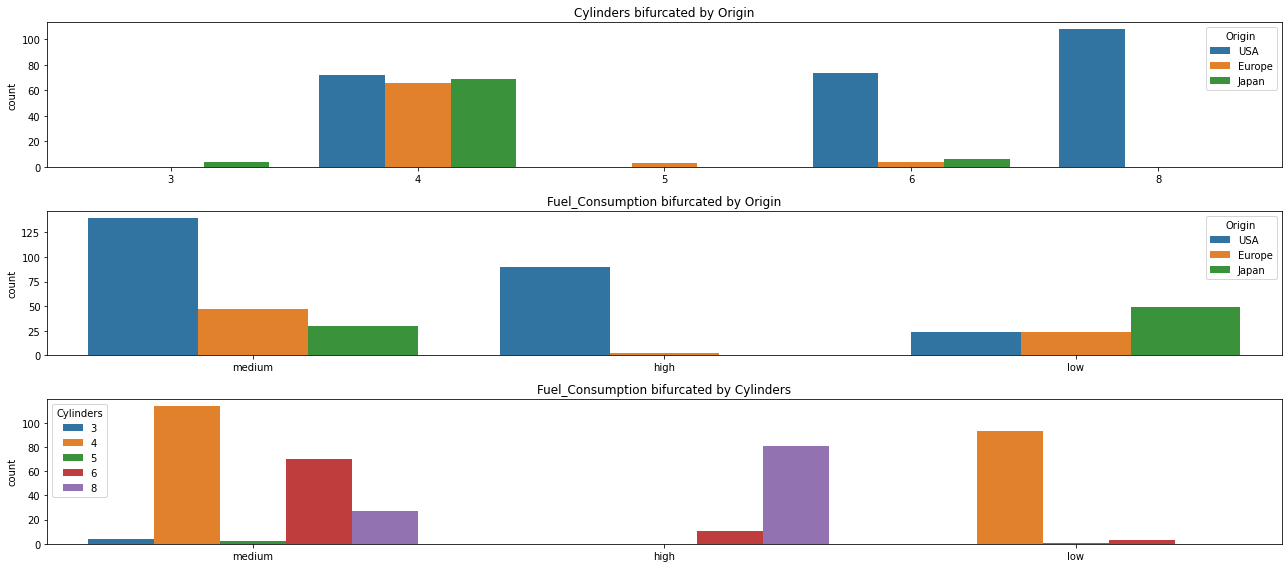

In [38]:
combos = itertools.combinations(['Origin', 'Cylinders', 'Fuel_Consumption'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
    i+=1
    ax = plt.subplot(3,1,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

### Insight: Graph 3 indicates that more cylinders equal higher fuel consumption

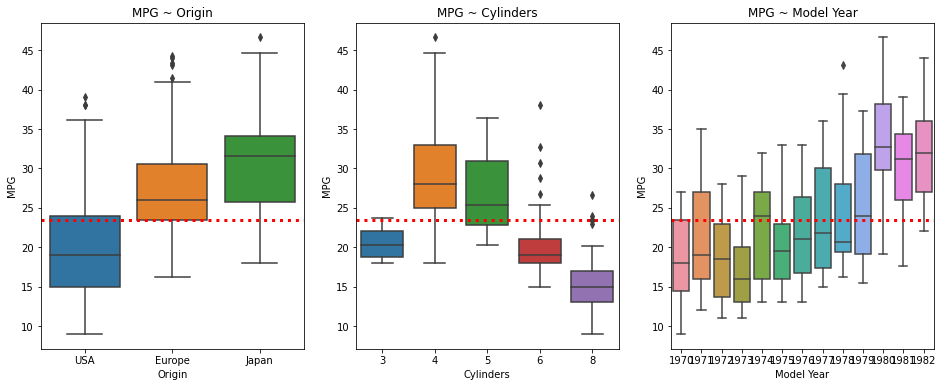

In [39]:
plt.figure(figsize = (16,6))

ax = plt.subplot(131)
ax = sns.boxplot(x = 'Origin', y = 'MPG', data = df)
plt.axhline(df.MPG.mean(), color='r', linestyle='dotted', linewidth=3)
ax.set_title('MPG ~ Origin')

ax = plt.subplot(132)
ax = sns.boxplot(x = 'Cylinders', y = 'MPG', data = df, ax = ax)
ax.set_title('MPG ~ Cylinders')
plt.axhline(df.MPG.mean(), color='r', linestyle='dotted', linewidth=3)

ax = plt.subplot(133)
ax = sns.boxplot(x = 'Model Year', y = 'MPG', data = df, ax = ax)
ax.set_title('MPG ~ Model Year')
plt.axhline(df.MPG.mean(), color='r', linestyle='dotted', linewidth=3)



### Insight 1: Graph 1 indicates that USA cars' fuel consumption is constantly over the average
### Insight 2: Graph 2 shows that cars with 4 and 5 cylinders are performing better than the rest

## One hot encoded to categorical data (Cylinders and Origin)

In [40]:
df=pd.get_dummies(df,columns=['Cylinders','Origin','Fuel_Consumption'])


## Analysis on numeric variables

**Distribution and Boxplot in numeric variables**

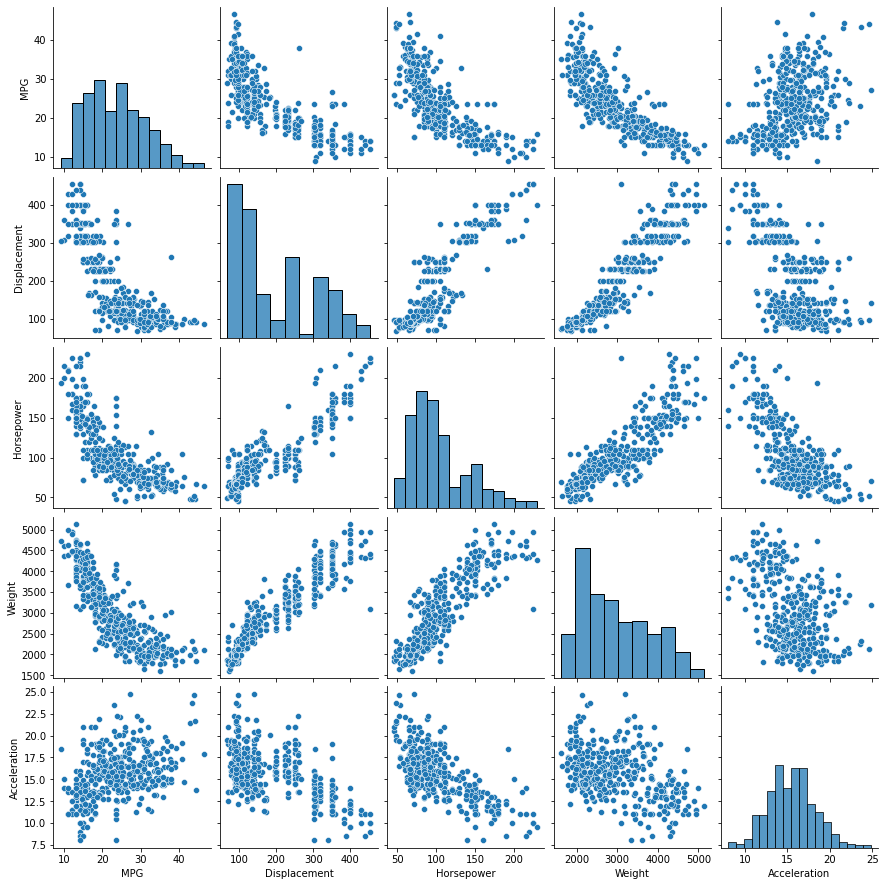

In [41]:
numeric_var = ['MPG',  'Displacement', 'Horsepower', 'Weight', 'Acceleration']
df4=df[numeric_var]
sns.pairplot(df4)
plt.show()

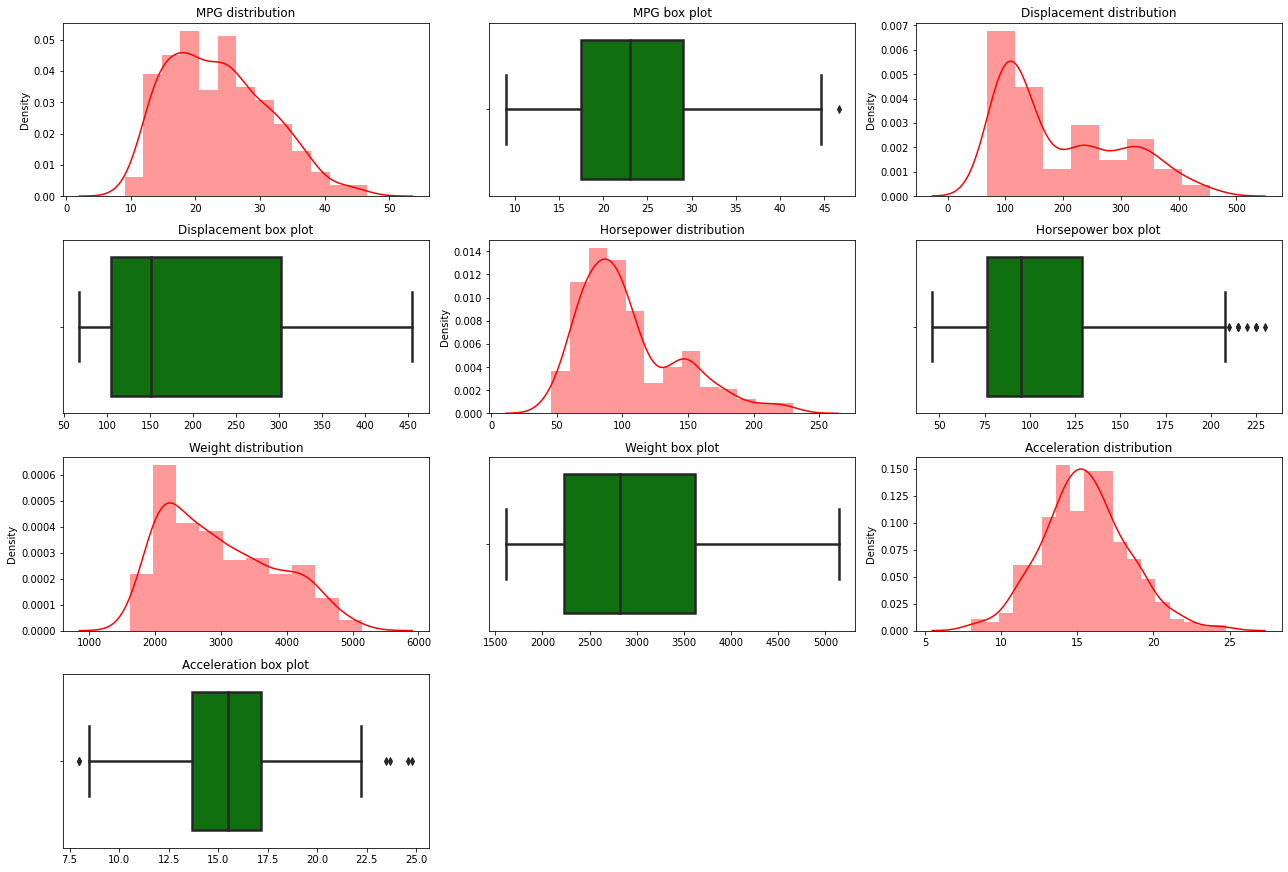

In [42]:
rows = len(numeric_var)
cols = 3

fig = plt.figure(2, (18, rows*3))

i = 0
for col in numeric_var:
    ###DISTRIBUTION PLOTS###
    i += 1
    ax1 = plt.subplot(rows, cols,i)

    sns.distplot(df[col],color='r')
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()
    ###BOX PLOTS###

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.boxplot(df[col],color='g', orient='h', linewidth=2.5)
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} box plot')
    plt.tight_layout()

### Mean MPG value per Model Year and Origin 

In [43]:
df_new = df.copy()


In [44]:
df_new.index = df_new['Model Year']

In [45]:
df_new.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Brand,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_Europe,Origin_Japan,Origin_USA,Fuel_Consumption_high,Fuel_Consumption_low,Fuel_Consumption_medium
Model Year,,,,,,,,,,,,,,,,,,
1970,18.0,307.0,130.0,3504,12.0,1970,Chevrolet,0,0,0,0,1,0,0,1,0,0,1
1970,15.0,350.0,165.0,3693,11.5,1970,Buick,0,0,0,0,1,0,0,1,1,0,0
1970,18.0,318.0,150.0,3436,11.0,1970,Plymouth,0,0,0,0,1,0,0,1,0,0,1
1970,16.0,304.0,150.0,3433,12.0,1970,AMC,0,0,0,0,1,0,0,1,1,0,0
1970,17.0,302.0,140.0,3449,10.5,1970,Ford,0,0,0,0,1,0,0,1,0,0,1


In [46]:
years = np.array(range(1970,1983))
df_new = df_new.drop('Model Year', axis = 1)

f_Europe = df_new[df_new['Origin_Europe'] == 1].groupby('Model Year')
Europe = pd.DataFrame()
for i in range(1970,1983):
    Europe = Europe.append([f_Europe.get_group(i).iloc[:,0].mean()])
Europe.index = years

f_Japan = df_new[df_new['Origin_Japan'] == 1].groupby('Model Year')
Japan = pd.DataFrame()
for i in range(1970,1983):
    Japan = Japan.append([f_Japan.get_group(i).iloc[:,0].mean()])
Japan.index = years

f_USA = df_new[df_new['Origin_USA'] == 1].groupby('Model Year')
USA = pd.DataFrame()
for i in range(1970,1983):
    USA = USA.append([f_USA.get_group(i).iloc[:,0].mean()])
USA.index = years


Text(0.5, 1.0, 'Avg MPG per Year and Origin')

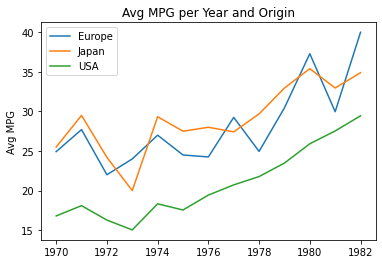

In [47]:
plt.plot(Europe, label = 'Europe')
plt.plot(Japan, label = 'Japan')
plt.plot(USA, label = 'USA')
plt.legend()
plt.ylabel('Avg MPG')
plt.title('Avg MPG per Year and Origin')

## Finding outliers 


#### As we can see from the box plots above, outliers (are points which lie outside the bars extending the plot) exist in acceleration,horsepower 

### **Tukey method to find outliers**

#### Tukey's range test, also known as Tukey's test, Tukey method, Tukey's honest significance test, or Tukey's HSD (honestly significant difference) test, is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other.

In [48]:
def find_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers
for col in numeric_var:
    outliers = find_outliers(df[col])
    if len(outliers):
        print(f"* {col} has these  outliers,\n{outliers}\n")
        print(f"* {col} has {df[col].count()}   values.\n")
        print(f"* Percentage of outliers is {100*len(outliers)/df[col].count()} %  \n")
    else:
        print(f"* {col} doesn't have any  outliers.\n")

* MPG has these  outliers,
329    46.6
Name: MPG, dtype: float64

* MPG has 406   values.

* Percentage of outliers is 0.24630541871921183 %  

* Displacement doesn't have any  outliers.

* Horsepower has these  outliers,
6      220.0
7      215.0
8      225.0
19     225.0
31     215.0
33     210.0
101    215.0
102    225.0
123    230.0
Name: Horsepower, dtype: float64

* Horsepower has 406   values.

* Percentage of outliers is 2.2167487684729066 %  

* Weight doesn't have any  outliers.

* Acceleration has these  outliers,
16      8.0
17      8.0
66     23.5
306    24.8
333    23.7
402    24.6
Name: Acceleration, dtype: float64

* Acceleration has 406   values.

* Percentage of outliers is 1.477832512315271 %  



# **Suggested solution to handle outliers**

**Since the percentage of outliers is bigger than 0,3%(upper bound percentage of outliers in data pints)  in horsepower(2,21%) and acceleration (1,47%) so we cannot neglect them or drop them since they are significant percentage of data and it will lead to wrong conclusions**

In [49]:
df9 = pd.concat([df.reset_index(drop=True), df.iloc[:,5:19]], axis=1)

In [50]:
df9

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Brand,Cylinders_3,Cylinders_4,Cylinders_5,...,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_Europe,Origin_Japan,Origin_USA,Fuel_Consumption_high,Fuel_Consumption_low,Fuel_Consumption_medium
0,18.0,307.0,130.0,3504,12.0,1970,Chevrolet,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,15.0,350.0,165.0,3693,11.5,1970,Buick,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,1970,Plymouth,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,16.0,304.0,150.0,3433,12.0,1970,AMC,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,1970,Ford,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,140.0,86.0,2790,15.6,1982,Ford,0,1,0,...,1,0,0,0,0,0,1,0,0,1
402,44.0,97.0,52.0,2130,24.6,1982,Volkswagen,0,1,0,...,1,0,0,0,1,0,0,0,1,0
403,32.0,135.0,84.0,2295,11.6,1982,Dodge,0,1,0,...,1,0,0,0,0,0,1,0,1,0
404,28.0,120.0,79.0,2625,18.6,1982,Ford,0,1,0,...,1,0,0,0,0,0,1,0,0,1


#### Export data to an .xlsx file to use it for vizualization

In [51]:
df9.to_excel('mpg_data_5.xlsx') 